# Outliers 

Detection and Treatment of Outliers 


# 1. Z-Score Method

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv('dataset\placement_oultlier.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_16148\4284113905.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],)
C:\Users\dell\AppData\Local\Temp\ipykernel_16148\4284113905.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


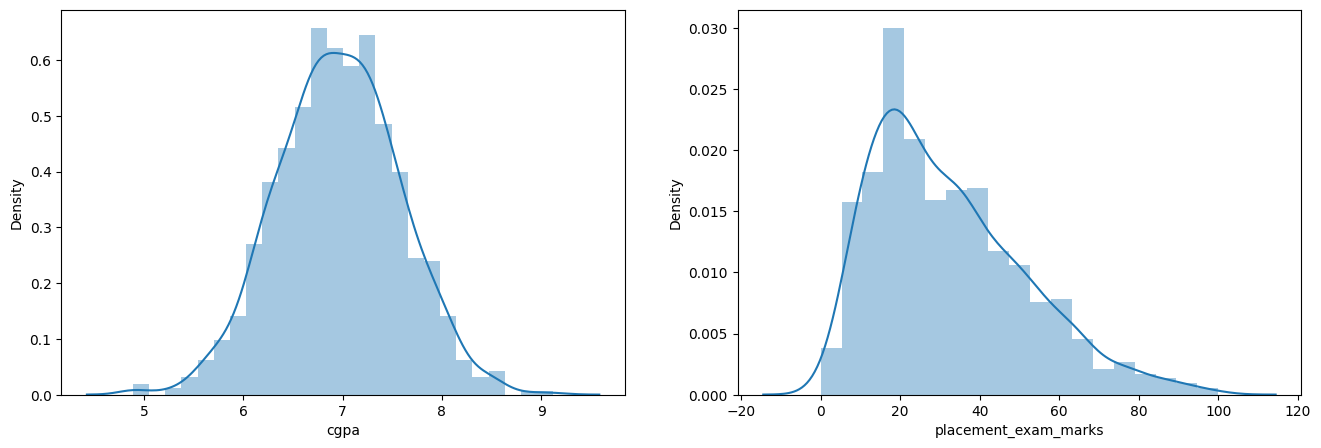

In [4]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'],)

plt.subplot(1,2,2)

sns.distplot(df['placement_exam_marks'])

plt.show()

In [5]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [6]:
# Finding the boundary values 
print ("Highest allowed :",df['cgpa'].mean() + 3*df['cgpa'].std())
print ("Lowest allowed :",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed : 8.808933625397168
Lowest allowed : 5.113546374602832


In [7]:
# finding the outliers
df[(df['cgpa'] > 8.808933625397168 ) | (df['cgpa'] < 5.113546374602832) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [8]:
# Trimming
new_df = df[(df['cgpa'] < 8.808933625397168 ) & (df['cgpa'] > 5.113546374602832) ]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [9]:
df.shape ,new_df.shape # rows are less in dataset

((1000, 3), (995, 3))

# Method 2  removal of outlier using Z -score

Z =( x -mean)/standard deviation

In [10]:
# approach 2
# Calculating Z-score
df['cgpa_z_score'] = (df['cgpa'] -df['cgpa'].mean())/df['cgpa'].std()

In [11]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [12]:
df[df['cgpa_z_score'] >3] # more than 3 ---> +3

,cgpa,placement_exam_marks,placed,cgpa_z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [13]:
df[df['cgpa_z_score'] <  (-3)] # less than 3 ---> -3 

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [14]:
new_df2 = df[(df['cgpa_z_score']  < 3) & (df['cgpa_z_score']  >(-3) )]
new_df2

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping 

In [15]:
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit =df['cgpa'].mean() - 3*df['cgpa'].std()

In [16]:
# np.where(condition, [x, y])
# condition: A condition to be checked (e.g., arr > 0)
# x: (Optional) Values to use where the condition is True
# y: (Optional) Values to use where the condition is False



df['cgpa'] =np.where(df['cgpa']>upper_limit ,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit ,df['cgpa']))

In [17]:
df.shape # --> it done the capping without removing the outlier or removing the rows

(1000, 4)

In [18]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


.

.

.

# IQR - Quantile Method for Skewed DATA

DETECT AND TREAT OUTLIERS


In [37]:
df =pd.read_csv('dataset\placement_oultlier.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_16148\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

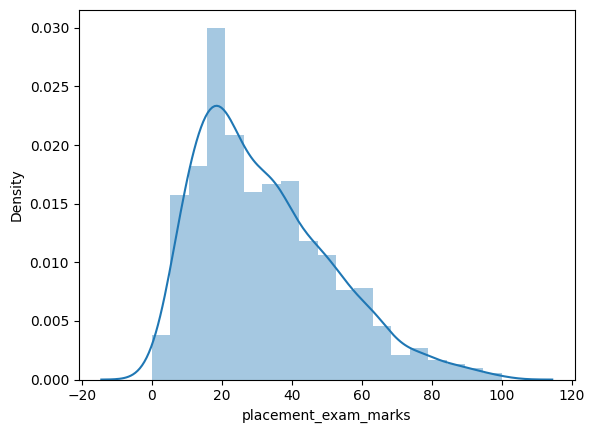

In [38]:
sns.distplot(df['placement_exam_marks'])

In [39]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [40]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

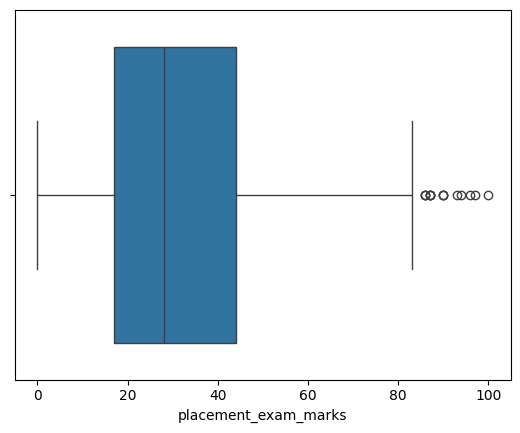

In [41]:
sns.boxplot(x =df['placement_exam_marks'] )


In [42]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [43]:
# finding percentile by qunatile method
percentile25 =df['placement_exam_marks'].quantile(0.25)
percentile75 =df['placement_exam_marks'].quantile(0.75)

In [44]:
percentile25 ,percentile75

(17.0, 44.0)

In [46]:
# finding the IQR --->IQR = Q75 -Q25 
IQR = percentile75 -percentile25

In [47]:
# Setting the limit 
min_limit = percentile25 - (1.5)*IQR
max_limit =percentile75 + (1.5)*IQR

In [48]:
min_limit ,max_limit

(-23.5, 84.5)

In [50]:
IQR

27.0

In [53]:
df[df['placement_exam_marks'] < min_limit] # min limit

,cgpa,placement_exam_marks,placed


In [56]:
df[df['placement_exam_marks'] > max_limit] # max limit

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [54]:
df[(df['placement_exam_marks'] > max_limit ) | (df['placement_exam_marks'] < min_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming


In [58]:
df1 =df[(df['placement_exam_marks'] < max_limit )]
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\dell\AppData\Local\Temp\ipykernel_16148\2967613401.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\dell\AppData\Local\Temp\ipykernel_16148\2967613401.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['placement_exam_marks'])


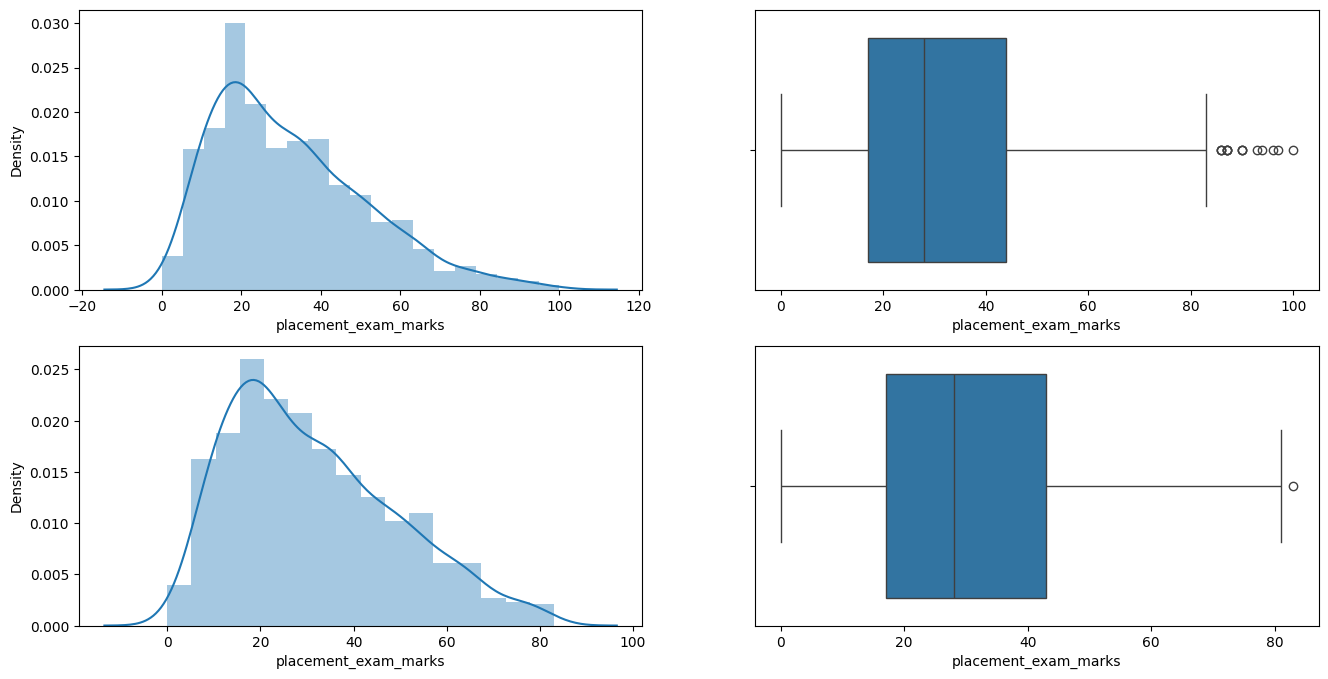

In [63]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(df1['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(x =df1['placement_exam_marks'])

plt.show()

# Capping

In [67]:
df2 = df.copy()

df2['placement_exam_marks'] =np.where(df2['placement_exam_marks'] > max_limit ,max_limit ,np.where(df2['placement_exam_marks']<lower_limit,lower_limit ,df['placement_exam_marks']))

In [69]:
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\dell\AppData\Local\Temp\ipykernel_16148\2990963507.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\dell\AppData\Local\Temp\ipykernel_16148\2990963507.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['placement_exam_marks'])


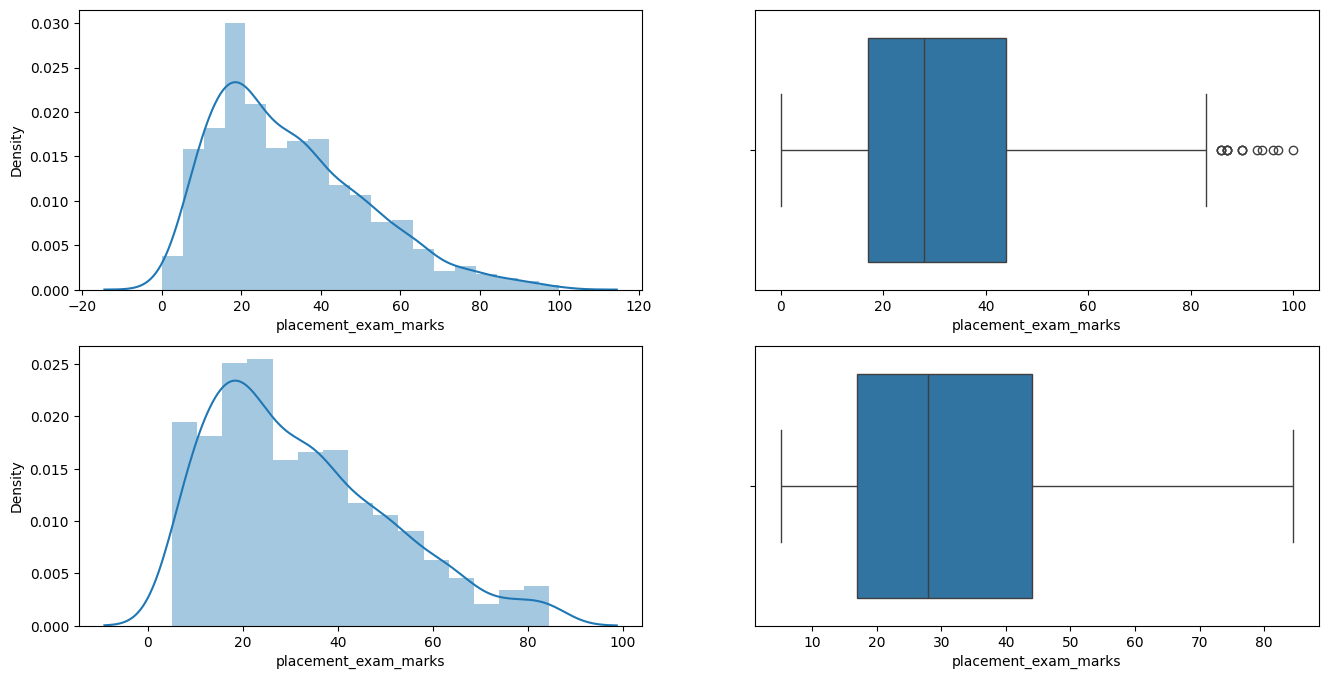

In [70]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(df2['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(x =df2['placement_exam_marks'])

plt.show()

# Percentile Method 

capping in percentile method is known as Winserization

In [74]:
pm =pd.read_csv('dataset\weight-height.csv')

In [75]:
pm.shape

(10000, 3)

In [76]:
pm['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_16148\1877263288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pm['Height'])


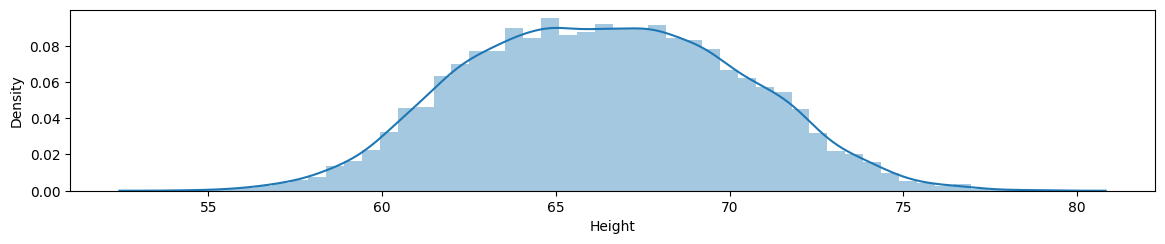

In [80]:
plt.figure(figsize=(14,8))
plt.subplot(3,1,1)
sns.distplot(pm['Height'])
plt.show()


<Axes: xlabel='Height'>

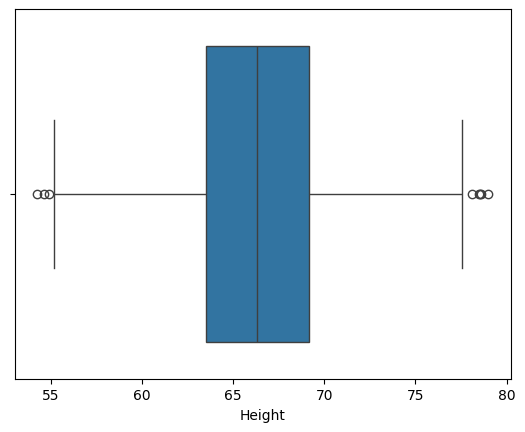

In [83]:
sns.boxplot(x=pm['Height'])

In [88]:
upper_limit1 = pm['Height'].quantile(0.99)  # percentile 99%
lower_limit1 =pm['Height'].quantile(0.01) # percentile 1%

In [89]:
upper_limit1 ,lower_limit1

(74.7857900583366, 58.13441158671655)

In [91]:
pm[pm['Height'] >= upper_limit1]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
4565,Male,75.690384,223.587548
4569,Male,77.547186,242.041173
4701,Male,76.732446,241.686601
4721,Male,75.330847,240.440816


In [92]:
pm[pm['Height'] <= lower_limit1]

,Gender,Height,Weight
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
5123,Female,56.445685,96.640245
5162,Female,57.961936,112.226984
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [95]:
pm[(pm['Height'] <= lower_limit1) | (pm['Height'] >= upper_limit1)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [98]:
# Trimming
pm_trimming = pm[(pm['Height'] >= lower_limit1) & (pm['Height'] <= upper_limit1)]

In [99]:
pm_trimming

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Winsorization

In [114]:
# Capping--->Winsorization
pm_cap = pm.copy()

pm_cap['Height'] = np.where(pm_cap['Height'] >= upper_limit1,upper_limit1,np.where(pm_cap['Height'] <= lower_limit1,lower_limit1,pm_cap['Height']))



In [110]:
pm_cap

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\dell\AppData\Local\Temp\ipykernel_16148\2182772425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pm_cap['Height'])


<Axes: xlabel='Height', ylabel='Density'>

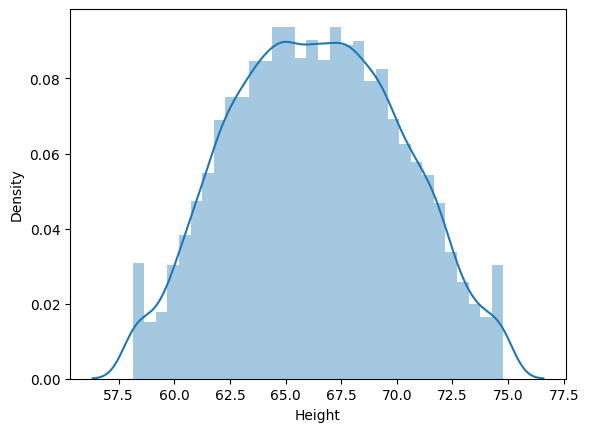

In [111]:
sns.distplot(pm_cap['Height'])

<Axes: xlabel='Height'>

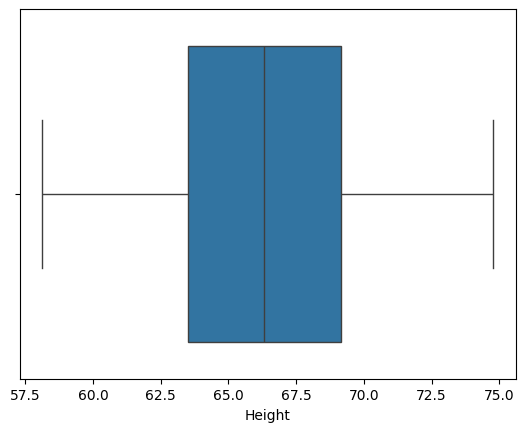

In [113]:
sns.boxplot(x =pm_cap['Height'])